In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import re
import nltk
from nltk.stem import PorterStemmer # for stemming
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import requests
url = 'https://raw.githubusercontent.com/raviyadav14697/Stock-Price-Prediction-using-News-Headlines-Twitter-Sentiment-Analysis-and-Historical-Data/master/news/input/finalsortedmoneycontrol.csv'
res = requests.get(url, allow_redirects=True)
with open('infy_news.csv','wb') as file:
    file.write(res.content)

In [ ]:
!gdown https://drive.google.com/uc?id=1blqEPpxXOEsN0keV7yeCm-nLC37GhKBe

Downloading...
From: https://drive.google.com/uc?id=1blqEPpxXOEsN0keV7yeCm-nLC37GhKBe
To: /content/infy_news.csv
100% 361k/361k [00:00<00:00, 51.6MB/s]


In [ ]:
infy_news = pd.read_csv('infy_news.csv')
infy_news.head()

,time,date,Source,News Headlines
0,3.38 pm,2009-01-01,Moneycontrol.com,Infy Q3 PAT seen at Rs 1572 cr: KRChoksey
1,9.05 am,2009-01-01,Business Line,Corporate houses seek CISF protection
2,8.44 pm,2009-01-05,Moneycontrol.com,"Hold Infosys Tech, TCS, Satyam: Emkay Global"
3,1.00 pm,2009-01-05,Moneycontrol.com,Infosys' Dec qtr PAT seen at Rs 1491 cr: Angel
4,8.53 am,2009-01-06,Business Line,IT majors may miss Q3 revenue forecast: CLSA


In [ ]:
infy_news.tail()

,time,date,Source,News Headlines
4223,2.48 pm,2018-01-22,PTI,Infosys selected as tech partner by A S Watson...
4224,2.59 pm,2018-01-22,PTI,Startups will flourish if regulations are ease...
4225,7.27 pm,2018-01-22,Moneycontrol.com,News highlights of the day: 'India's Osama' ma...
4226,12.22 pm,2018-01-24,CNBC-TV18,"Buy Infosys, TCS, Mphasis, Polaris, Tata Elxsi..."
4227,9.49 am,2018-01-25,Moneycontrol.com,No high beta but quality to lead rally in 2018...


In [ ]:
infy_news = infy_news.rename(columns={'News Headlines': 'headlines'})

In [ ]:
infy_news.drop(['time', 'Source'], axis = 1, inplace = True)
infy_news.head()

,date,headlines
0,2009-01-01,Infy Q3 PAT seen at Rs 1572 cr: KRChoksey
1,2009-01-01,Corporate houses seek CISF protection
2,2009-01-05,"Hold Infosys Tech, TCS, Satyam: Emkay Global"
3,2009-01-05,Infosys' Dec qtr PAT seen at Rs 1491 cr: Angel
4,2009-01-06,IT majors may miss Q3 revenue forecast: CLSA


In [ ]:
infy_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4228 entries, 0 to 4227
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       4228 non-null   object
 1   headlines  4228 non-null   object
dtypes: object(2)
memory usage: 66.2+ KB


In [ ]:
def clean(headlines):
    headlines = re.sub('[^a-zA-Z0-9]', ' ', headlines)
    headlines = headlines.lower()
    return headlines

In [ ]:
infy_news['cleaned'] = pd.DataFrame(infy_news['headlines'].apply(lambda x: clean(x)))
infy_news.head()

,date,headlines,cleaned
0,2009-01-01,Infy Q3 PAT seen at Rs 1572 cr: KRChoksey,infy q3 pat seen at rs 1572 cr krchoksey
1,2009-01-01,Corporate houses seek CISF protection,corporate houses seek cisf protection
2,2009-01-05,"Hold Infosys Tech, TCS, Satyam: Emkay Global",hold infosys tech tcs satyam emkay global
3,2009-01-05,Infosys' Dec qtr PAT seen at Rs 1491 cr: Angel,infosys dec qtr pat seen at rs 1491 cr angel
4,2009-01-06,IT majors may miss Q3 revenue forecast: CLSA,it majors may miss q3 revenue forecast clsa


In [ ]:
infy_news['stemmed'] = ''

In [ ]:
stemmer = PorterStemmer()

for i in range(len(infy_news['cleaned'])):
    words = nltk.word_tokenize(infy_news['cleaned'][i])
    words = [stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
    infy_news['stemmed'][i] = ' '.join(words)

In [ ]:
infy_news.head(10)

,date,headlines,cleaned,stemmed
0,2009-01-01,Infy Q3 PAT seen at Rs 1572 cr: KRChoksey,infy q3 pat seen at rs 1572 cr krchoksey,infi q3 pat seen rs 1572 cr krchoksey
1,2009-01-01,Corporate houses seek CISF protection,corporate houses seek cisf protection,corpor hous seek cisf protect
2,2009-01-05,"Hold Infosys Tech, TCS, Satyam: Emkay Global",hold infosys tech tcs satyam emkay global,hold infosi tech tc satyam emkay global
3,2009-01-05,Infosys' Dec qtr PAT seen at Rs 1491 cr: Angel,infosys dec qtr pat seen at rs 1491 cr angel,infosi dec qtr pat seen rs 1491 cr angel
4,2009-01-06,IT majors may miss Q3 revenue forecast: CLSA,it majors may miss q3 revenue forecast clsa,major may miss q3 revenu forecast clsa
5,2009-01-06,Infosys Q3 PAT seen at Rs 1501.01 cr: Reliance...,infosys q3 pat seen at rs 1501 01 cr reliance...,infosi q3 pat seen rs 1501 01 cr relianc money
6,2009-01-06,Infosys Tech Q3 PAT seen up at Rs 1520.6 cr: E...,infosys tech q3 pat seen up at rs 1520 6 cr e...,infosi tech q3 pat seen rs 1520 6 cr emkay
7,2009-01-07,"Satyam scam: Infosys, peers react",satyam scam infosys peers react,satyam scam infosi peer react
8,2009-01-07,Security fears may deter new outsourcing custo...,security fears may deter new outsourcing custo...,secur fear may deter new outsourc custom
9,2009-01-08,Infy Dec qtr PAT seen at Rs 5607 cr: Religare,infy dec qtr pat seen at rs 5607 cr religare,infi dec qtr pat seen rs 5607 cr religar


In [ ]:
infy_news2 = infy_news.groupby(['date'])['cleaned'].apply(' '.join).reset_index()
infy_news2.head()

,date,cleaned
0,2009-01-01,infy q3 pat seen at rs 1572 cr krchoksey co...
1,2009-01-05,hold infosys tech tcs satyam emkay global ...
2,2009-01-06,it majors may miss q3 revenue forecast clsa ...
3,2009-01-07,satyam scam infosys peers react security f...
4,2009-01-08,infy dec qtr pat seen at rs 5607 cr religare ...


In [ ]:
infy_news2['cleaned'][2]

'it majors may miss q3 revenue forecast  clsa    infosys q3 pat seen at rs 1501 01 cr  reliance money   infosys tech q3 pat seen up at rs 1520 6 cr  emkay  '

In [ ]:
infy_news2['cleaned'] = infy_news2['cleaned'].apply(lambda x: re.sub(' +', ' ', x))

In [ ]:
infy_news2['cleaned'][2]

'it majors may miss q3 revenue forecast clsa infosys q3 pat seen at rs 1501 01 cr reliance money infosys tech q3 pat seen up at rs 1520 6 cr emkay '

In [ ]:
infy_news2['date'] = infy_news2['date'].apply(lambda x: (x[8:]+'-'+x[5:7]+'-'+x[:4]))

In [ ]:
infy_news2.head()

,date,cleaned
0,01-01-2009,infy q3 pat seen at rs 1572 cr krchoksey corpo...
1,05-01-2009,hold infosys tech tcs satyam emkay global info...
2,06-01-2009,it majors may miss q3 revenue forecast clsa in...
3,07-01-2009,satyam scam infosys peers react security fears...
4,08-01-2009,infy dec qtr pat seen at rs 5607 cr religare w...


In [ ]:
!gdown https://drive.google.com/uc?id=18A9cmTDKhFYYprFhzJ_RfqgMLdXkUsqz

Downloading...
From: https://drive.google.com/uc?id=18A9cmTDKhFYYprFhzJ_RfqgMLdXkUsqz
To: /content/INFY_2009-2018.csv
100% 127k/127k [00:00<00:00, 37.7MB/s]


In [ ]:
infy_stock = pd.read_csv('INFY_2009-2018.csv')
infy_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-2009,3.06375,3.15625,3.02000,3.14375,2.402604,14917600
1,05-01-2009,3.09750,3.26750,3.09750,3.24875,2.482850,20835200
2,06-01-2009,3.25000,3.37375,3.22125,3.32500,2.541124,30572000
3,07-01-2009,3.16625,3.53875,3.14375,3.36750,2.573604,51324800
4,08-01-2009,3.33375,3.40625,3.28500,3.33000,2.544945,22020800


In [ ]:
infy_stock.shape

(2286, 7)

In [ ]:
infy_news2.shape

(1590, 2)

In [ ]:
infy_stock.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis = 1, inplace = True)

In [ ]:
infy_stock = infy_stock.rename(columns={'Date': 'date'})

In [ ]:
infy_final = pd.merge(infy_news2, infy_stock, how='left', on=['date'])
infy_final.head()

,date,cleaned,Close
0,01-01-2009,infy q3 pat seen at rs 1572 cr krchoksey corpo...,NaN
1,05-01-2009,hold infosys tech tcs satyam emkay global info...,3.24875
2,06-01-2009,it majors may miss q3 revenue forecast clsa in...,3.32500
3,07-01-2009,satyam scam infosys peers react security fears...,3.36750
4,08-01-2009,infy dec qtr pat seen at rs 5607 cr religare w...,3.33000


In [ ]:
infy_final.isnull().sum()

date         0
cleaned      0
Close      190
dtype: int64

In [ ]:
infy_final.tail()

,date,cleaned,Close
1585,16-01-2018,news highlights of the day airasia india says ...,8.890
1586,17-01-2018,it shares surge higher tcs infosys hcl tech to...,9.060
1587,22-01-2018,infosys selected as tech partner by a s watson...,9.145
1588,24-01-2018,buy infosys tcs mphasis polaris tata elxsi min...,9.230
1589,25-01-2018,no high beta but quality to lead rally in 2018...,9.225


In [ ]:
infy_final['Close'] = infy_final['Close'].bfill(axis ='rows')
infy_final.head()

,date,cleaned,Close
0,01-01-2009,infy q3 pat seen at rs 1572 cr krchoksey corpo...,3.24875
1,05-01-2009,hold infosys tech tcs satyam emkay global info...,3.24875
2,06-01-2009,it majors may miss q3 revenue forecast clsa in...,3.32500
3,07-01-2009,satyam scam infosys peers react security fears...,3.36750
4,08-01-2009,infy dec qtr pat seen at rs 5607 cr religare w...,3.33000


In [ ]:
infy_final['Compound'] = ''
infy_final['Negative'] = ''
infy_final['Neutral'] = ''
infy_final['Positive'] = ''
infy_final.head()

,date,cleaned,Close,Compound,Negative,Neutral,Positive
0,01-01-2009,infy q3 pat seen at rs 1572 cr krchoksey corpo...,3.24875,,,,
1,05-01-2009,hold infosys tech tcs satyam emkay global info...,3.24875,,,,
2,06-01-2009,it majors may miss q3 revenue forecast clsa in...,3.32500,,,,
3,07-01-2009,satyam scam infosys peers react security fears...,3.36750,,,,
4,08-01-2009,infy dec qtr pat seen at rs 5607 cr religare w...,3.33000,,,,


In [ ]:
infy_final_new = infy_final.copy()

In [ ]:
sentiment_i_a = SentimentIntensityAnalyzer()

for indexx, row in infy_final_new.T.iteritems():
    sentence_i = unicodedata.normalize('NFKD', infy_final_new.loc[indexx, 'cleaned'])
    sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
    infy_final_new.at[indexx, 'Compound']= sentence_sentiment['compound']
    infy_final_new.at[indexx, 'Negative']= sentence_sentiment['neg']
    infy_final_new.at[indexx, 'Neutral']= sentence_sentiment['neu']
    infy_final_new.at[indexx, 'Positive']= sentence_sentiment['pos']

In [ ]:
infy_final_new.head(10)

,date,cleaned,Close,Compound,Negative,Neutral,Positive
0,01-01-2009,infy q3 pat seen at rs 1572 cr krchoksey corpo...,3.24875,0,0,1,0
1,05-01-2009,hold infosys tech tcs satyam emkay global info...,3.24875,0,0,1,0
2,06-01-2009,it majors may miss q3 revenue forecast clsa in...,3.32500,-0.1531,0.052,0.948,0
3,07-01-2009,satyam scam infosys peers react security fears...,3.36750,-0.6249,0.363,0.503,0.134
4,08-01-2009,infy dec qtr pat seen at rs 5607 cr religare w...,3.33000,0.3612,0,0.884,0.116
5,10-01-2009,infosys dec qtr pat seen at rs 1538 6 cr p lil...,3.23500,0,0,1,0
6,12-01-2009,infosys q3 pat seen up 7 to rs 1532 cr,3.23500,0,0,1,0
7,13-01-2009,infy lowers full year guidance on currency flu...,3.42500,0.5574,0.023,0.93,0.047
8,14-01-2009,reduce infosys target of rs 1250 iifl hdfc sec...,3.30375,0.7003,0,0.92,0.08
9,15-01-2009,accumulate infosys technologies parag parikh h...,3.39375,0,0,1,0


% of positive tweets=  40.37735849056604
% of negative tweets=  14.08805031446541


[]

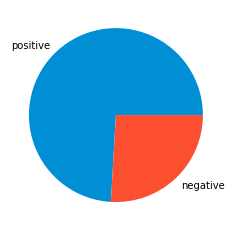

In [ ]:
posi=0
nega=0
for i in range (0,len(infy_final_new)):
    get_val=infy_final_new.Compound[i]
    if(float(get_val)<(0)):
        nega=nega+1
    if(float(get_val>(0))):
        posi=posi+1
posper=(posi/(len(infy_final_new)))*100
negper=(nega/(len(infy_final_new)))*100
print("% of positive news= ",posper)
print("% of negative news= ",negper)
arr = np.asarray([posper,negper], dtype=int)
plt.pie(arr, labels=['positive','negative'])
plt.plot()

% of positive news=  40.37735849056604
% of negative news=  14.08805031446541
% of negative news=  45.534591194968556


[]

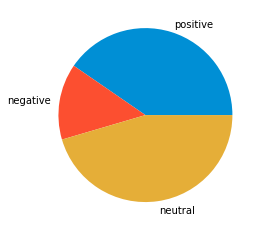

In [ ]:
posi=0
nega=0
neu=0
for i in range (0,len(infy_final_new)):
    get_val=infy_final_new.Compound[i]
    if(float(get_val)<(0)):
        nega=nega+1
    if(float(get_val>(0))):
        posi=posi+1
    if(float(get_val==(0.0))):
        neu=neu+1
posper=(posi/(len(infy_final_new)))*100
negper=(nega/(len(infy_final_new)))*100
neuper=(neu/(len(infy_final_new)))*100
print("% of positive news= ",posper)
print("% of negative news= ",negper)
print("% of neutral news= ",neuper)
arr = np.asarray([posper,negper,neuper], dtype=int)
plt.pie(arr, labels=['positive','negative','neutral'])
plt.plot()

In [ ]:
infy_final_new2 = infy_final_new[['date','Close','Compound','Negative','Neutral','Positive']].copy()
infy_final_new2.head()

,date,Close,Compound,Negative,Neutral,Positive
0,01-01-2009,3.24875,0,0,1,0
1,05-01-2009,3.24875,0,0,1,0
2,06-01-2009,3.32500,-0.1531,0.052,0.948,0
3,07-01-2009,3.36750,-0.6249,0.363,0.503,0.134
4,08-01-2009,3.33000,0.3612,0,0.884,0.116


In [ ]:
length_train = 1406
train = infy_final_new2.iloc[:length_train,:] # training data from 2009-2016
test = infy_final_new2.iloc[length_train:,: ] # testing data on 2017-2018

In [ ]:
train.shape

(1406, 6)

In [ ]:
test.shape

(184, 6)

In [ ]:
sentiment_score_list = []

for date, row in train.T.iteritems():
    sentiment_score = np.asarray([infy_final_new2.loc[date, 'Negative'], infy_final_new2.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)

numpy_df_train = np.asarray(sentiment_score_list)

In [ ]:
numpy_df_train[0:10]

array([[0.   , 0.   ],
       [0.   , 0.   ],
       [0.052, 0.   ],
       [0.363, 0.134],
       [0.   , 0.116],
       [0.   , 0.   ],
       [0.   , 0.   ],
       [0.023, 0.047],
       [0.   , 0.08 ],
       [0.   , 0.   ]])

In [ ]:
sentiment_score_list = []

for date, row in test.T.iteritems():
    sentiment_score = np.asarray([infy_final_new2.loc[date, 'Negative'], infy_final_new2.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)

numpy_df_test = np.asarray(sentiment_score_list)

In [ ]:
numpy_df_test[0:10]

array([[0.085, 0.   ],
       [0.   , 0.   ],
       [0.   , 0.   ],
       [0.083, 0.092],
       [0.   , 0.   ],
       [0.   , 0.231],
       [0.122, 0.   ],
       [0.   , 0.129],
       [0.055, 0.133],
       [0.   , 0.237]])

In [ ]:
y_train = pd.DataFrame(train['Close'])
y_test = pd.DataFrame(test['Close'])

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(numpy_df_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
prediction = reg.predict(numpy_df_test)

In [ ]:
prediction[0:10]

array([[7.10622961],
       [7.2212801 ],
       [7.2212801 ],
       [7.11763565],
       [7.2212801 ],
       [7.24312208],
       [7.0561488 ],
       [7.23347757],
       [7.15941135],
       [7.24368941]])

In [ ]:
idx = np.arange(int(length_train), len(infy_final_new2))
df_predictions = pd.DataFrame(data=prediction[0:], index = idx, columns=['Close'])

In [ ]:
df_predictions.head()

,Close
1406,7.106230
1407,7.221280
1408,7.221280
1409,7.117636
1410,7.221280


([], <a list of 0 Text major ticklabel objects>)

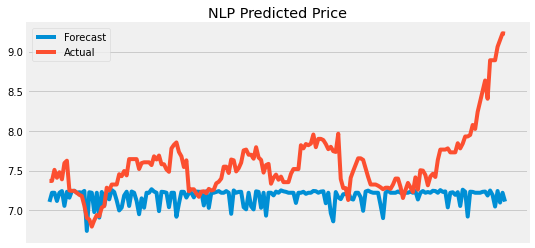

In [ ]:
plt.rcParams['figure.figsize'] = (8,4)
ax = df_predictions.rename(columns={'Close': 'Forecast'}).plot(title='NLP Predicted Price')   #forecast value
fig = y_test.rename(columns={'Close': 'Actual'}).plot(ax = ax).get_figure()     #actual value
plt.xticks([])